<a href="https://colab.research.google.com/github/arinajman/personal/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unir la información del proyecto 1, S&P500 desde Yahoo Finance, con la información del proyecto 3, 1 year US Trasury Bill desde Federal Reserve Economic Data y del proyecto 4, inflación de EEUU.

In [1]:
import pandas as pd
from google.colab import drive
import pickle
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

drive.mount('/content/drive')

# Define las rutas donde guardaste los DataFrames serializados
ruta_cargado1_pkl = '/content/drive/MyDrive/df1.pkl'
ruta_cargado2_pkl = '/content/drive/MyDrive/df2.pkl'
ruta_cargado3_pkl = '/content/drive/MyDrive/df3.pkl'

# Deserializa y carga el primer DataFrame
with open(ruta_cargado1_pkl, 'rb') as archivo:
    df1_cargado = pickle.load(archivo)

print("DataFrame 1 cargado:")
display(df1_cargado)

# Deserializa y carga el segundo DataFrame
with open(ruta_cargado2_pkl, 'rb') as archivo:
    df2_cargado = pickle.load(archivo)

print("\nDataFrame 2 cargado:")
display(df2_cargado)

# Deserializa y carga el tercer DataFrame
with open(ruta_cargado3_pkl, 'rb') as archivo:
    df3_cargado = pickle.load(archivo)

print("\nDataFrame 3 cargado:")
display(df3_cargado)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame 1 cargado:


,SP500,Variation (%),Dividend (%),Dividend ($),Total Value,Total Variation (%)
Year,,,,,,
1927,17.66,0.0,0.00,0.00,17.66,0.0
1928,24.35,37.9,3.67,0.89,25.24,42.9
1929,21.45,-11.9,4.53,0.97,23.21,-8.0
1930,15.34,-28.5,6.32,0.97,17.56,-24.3
1931,8.12,-47.1,9.72,0.79,10.08,-42.6
...,...,...,...,...,...,...
2020,3756.07,16.3,1.58,59.35,16858.55,16.7
2021,4766.18,26.9,1.29,61.48,21454.98,27.3
2022,3839.50,-19.4,1.71,65.66,17358.37,-19.1



DataFrame 2 cargado:


,DGS1
DATE,
1963,3.05
1964,3.83
1965,3.99
1966,4.96
1967,5.00
...,...
2020,1.59
2021,0.10
2022,0.39



DataFrame 3 cargado:


,Inflation (%)
DATE,
1960,1.46
1961,1.07
1962,1.20
1963,1.24
1964,1.28
...,...
2020,1.23
2021,4.70
2022,8.00


In [2]:
df1=df1_cargado['Total Variation (%)']
df2=df2_cargado
df3=df3_cargado
df1=df1.to_frame().rename(columns={'Total Variation (%)': 'SP500'})
display(df1)
df2.rename_axis('Year',inplace=True)
df2 = df2.rename(columns={'DGS1': 'TB1Y'})
display(df2)
df3.rename_axis('Year',inplace=True)
df3 = df3.rename(columns={'Inflation (%)': 'Inflation'})
display(df3)

,SP500
Year,
1927,0.0
1928,42.9
1929,-8.0
1930,-24.3
1931,-42.6
...,...
2020,16.7
2021,27.3
2022,-19.1


,TB1Y
Year,
1963,3.05
1964,3.83
1965,3.99
1966,4.96
1967,5.00
...,...
2020,1.59
2021,0.10
2022,0.39


,Inflation
Year,
1960,1.46
1961,1.07
1962,1.20
1963,1.24
1964,1.28
...,...
2020,1.23
2021,4.70
2022,8.00


Para analizar conjuntamente a df1 y df2, voy a acortar df1 al mismo rango de fechas que df2.

In [3]:
indice_inicial_df2 = df2.index.min()
print(f"\nEl índice inicial de df2 es: {indice_inicial_df2}")
posicion = df1.index.get_loc(indice_inicial_df2)
print(f"La posición de {indice_inicial_df2} en df1 es: {posicion}")
df1_short=df1[posicion:]
print("df1_short")
display(df1_short)
posicion_3 = df3.index.get_loc(indice_inicial_df2)
print(f"La posición de {indice_inicial_df2} en df3 es: {posicion_3}")
df3_short=df3[posicion_3:]
print("df3_short")
display(df3_short)


El índice inicial de df2 es: 1963
La posición de 1963 en df1 es: 36
df1_short


,SP500
Year,
1963,20.2
1964,14.2
1965,10.2
1966,-12.0
1967,21.4
...,...
2020,16.7
2021,27.3
2022,-19.1


La posición de 1963 en df3 es: 3
df3_short


,Inflation
Year,
1963,1.24
1964,1.28
1965,1.59
1966,3.02
1967,2.77
...,...
2020,1.23
2021,4.70
2022,8.00


In [4]:
df = pd.merge(df1_short, df2, left_index=True, right_index=True, how='inner')
print("DataFrame combinado:")
df

DataFrame combinado:


,SP500,TB1Y
Year,,
1963,20.2,3.05
1964,14.2,3.83
1965,10.2,3.99
1966,-12.0,4.96
1967,21.4,5.00
...,...,...
2020,16.7,1.59
2021,27.3,0.10
2022,-19.1,0.39


In [5]:
df = pd.merge(df, df3_short, left_index=True, right_index=True, how='inner')
print("DataFrame combinado:")
df

DataFrame combinado:


,SP500,TB1Y,Inflation
Year,,,
1963,20.2,3.05,1.24
1964,14.2,3.83,1.28
1965,10.2,3.99,1.59
1966,-12.0,4.96,3.02
1967,21.4,5.00,2.77
...,...,...,...
2020,16.7,1.59,1.23
2021,27.3,0.10,4.70
2022,-19.1,0.39,8.00


In [6]:
df.describe()

,SP500,TB1Y,Inflation
count,62.000000,62.000000,62.000000
mean,9.762903,4.853226,3.879194
std,16.317849,3.333464,2.750036
min,-38.000000,0.100000,-0.360000
25%,0.700000,2.285000,2.145000
50%,13.400000,4.900000,3.095000
75%,21.275000,6.940000,4.600000
max,34.900000,13.860000,13.550000


Box plot de SP500 y TB1Y

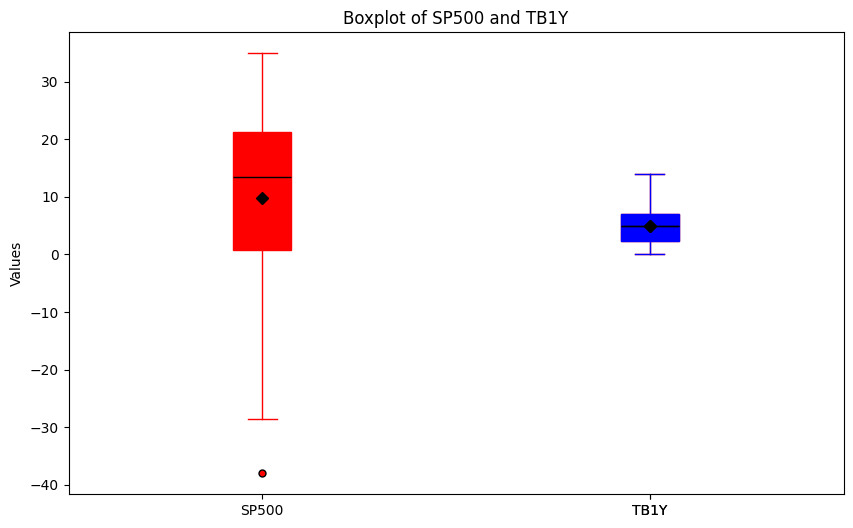

In [7]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.boxplot([df['SP500'], df['TB1Y']], tick_labels=['SP500', 'TB1Y'], patch_artist=True,
            boxprops=dict(facecolor='red', color='red'),
            whiskerprops=dict(color='red'),
            capprops=dict(color='red'),
            medianprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5),
            showmeans=True, meanprops=dict(markerfacecolor="black", markeredgecolor='black', marker='D')
            )
plt.boxplot([df['TB1Y']], positions=[2], tick_labels=['TB1Y'], patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='black'),
            flierprops=dict(markerfacecolor='blue', marker='o', markersize=5),
            showmeans=True, meanprops=dict(markerfacecolor="black", markeredgecolor='black', marker='D')
            )

plt.title('Boxplot of SP500 and TB1Y')
plt.ylabel('Values')
plt.show()

Rendimientos anuales

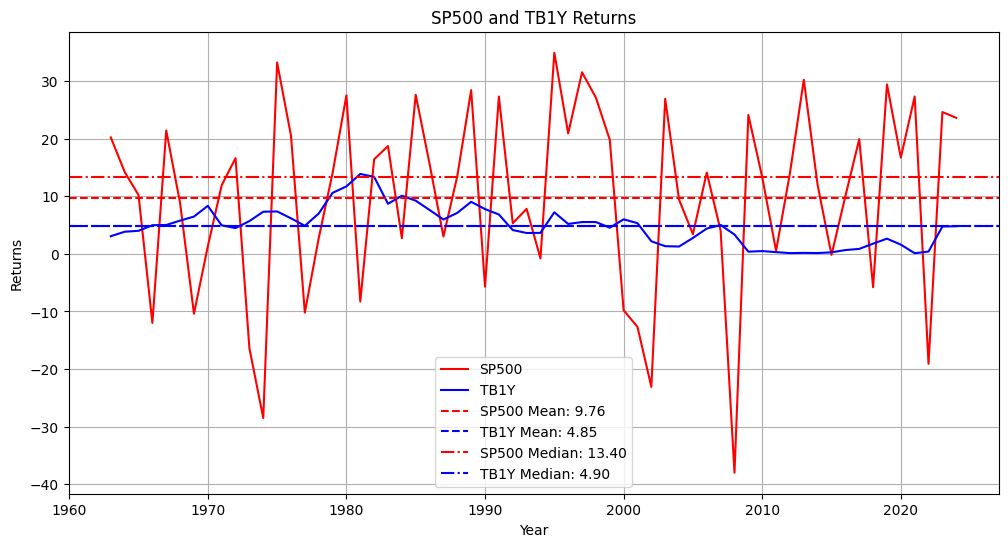

In [8]:
# Calculate mean and median for each series
sp500_mean = df['SP500'].mean()
tb1y_mean = df['TB1Y'].mean()
sp500_median = df['SP500'].median()
tb1y_median = df['TB1Y'].median()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['SP500'], label='SP500', color='red')
plt.plot(df.index, df['TB1Y'], label='TB1Y', color='blue')

# Add horizontal lines for mean and median
plt.axhline(y=sp500_mean, color='red', linestyle='--', label=f'SP500 Mean: {sp500_mean:.2f}')
plt.axhline(y=tb1y_mean, color='blue', linestyle='--', label=f'TB1Y Mean: {tb1y_mean:.2f}')
plt.axhline(y=sp500_median, color='red', linestyle='-.', label=f'SP500 Median: {sp500_median:.2f}')
plt.axhline(y=tb1y_median, color='blue', linestyle='-.', label=f'TB1Y Median: {tb1y_median:.2f}')


# Customize the plot
plt.title('SP500 and TB1Y Returns')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()


Rendimientos acumulados

In [9]:
accum=df.copy()
new_row = pd.DataFrame({'SP500': [1], 'TB1Y': [1], 'Inflation': [1]}, index=[1962])
accum = pd.concat([new_row, accum])

# Reset the index to make it a regular column y poder trabajar más fácilmente el for
accum = accum.reset_index()

# Rename the 'index' column to 'Year'
accum.rename(columns={'index': 'Year'}, inplace=True)

for i in range(1, len(accum)):
    accum.loc[i, 'SP500'] = accum.loc[i-1, 'SP500'] * (1 + accum.loc[i, 'SP500'] / 100)
    accum.loc[i, 'TB1Y'] = accum.loc[i-1, 'TB1Y'] * (1 + accum.loc[i, 'TB1Y'] / 100)
    accum.loc[i, 'Inflation'] = accum.loc[i-1, 'Inflation'] * (1 + accum.loc[i, 'Inflation'] / 100)

# Set the 'Year' column as the index again
accum = accum.set_index('Year')
accum

,SP500,TB1Y,Inflation
Year,,,
1962,1.000000,1.000000,1.000000
1963,1.202000,1.030500,1.012400
1964,1.372684,1.069968,1.025359
1965,1.512698,1.112660,1.041662
1966,1.331174,1.167848,1.073120
...,...,...,...
2020,95.714710,16.607068,8.554441
2021,121.844825,16.623675,8.956500
2022,98.572464,16.688508,9.673020


In [10]:
amount_years=len(accum)-1
result_sp500 = round((np.power(accum.iloc[-1, accum.columns.get_loc('SP500')], 1/amount_years)-1)*100,2)
result_tb1y = round((np.power(accum.iloc[-1, accum.columns.get_loc('TB1Y')], 1/amount_years)-1)*100,2)
result_infl = round((np.power(accum.iloc[-1, accum.columns.get_loc('Inflation')], 1/amount_years)-1)*100,2)
print(f"The annual return of SP500 is: {result_sp500}")
print(f"The annual return of TB1Y is: {result_tb1y}")
print(f"The annual Inflation is: {result_infl}")

The annual return of SP500 is: 8.44
The annual return of TB1Y is: 4.8
The annual Inflation is: 3.84


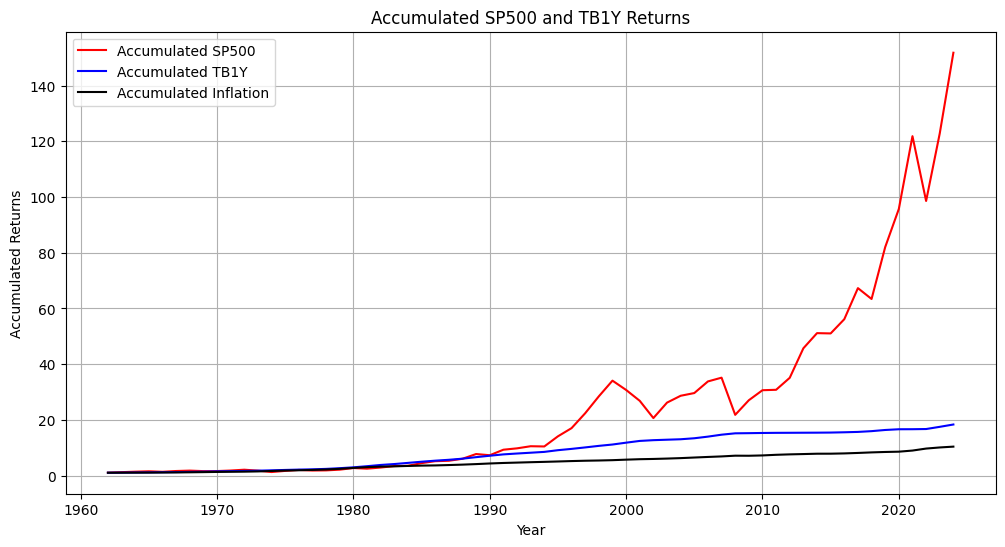

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(accum.index, accum['SP500'], label='Accumulated SP500', color='red')
plt.plot(accum.index, accum['TB1Y'], label='Accumulated TB1Y', color='blue')
plt.plot(accum.index, accum['Inflation'], label='Accumulated Inflation', color='black')

plt.title('Accumulated SP500 and TB1Y Returns')
plt.xlabel('Year')
plt.ylabel('Accumulated Returns')
plt.legend()
plt.grid(True)
plt.show()

Se puede partir la gráfica en tres intervalos:

1.   Hasta 1994 donde tienen un desempeño similar.
2.   Desde 1995 hasta 2008 donde el rendimiento acumulado es similar pero los rendimientos anuales son distintos.
3.   A partir de 2009 donde el rendimiento del SP500 es muy superior al del TB1Y



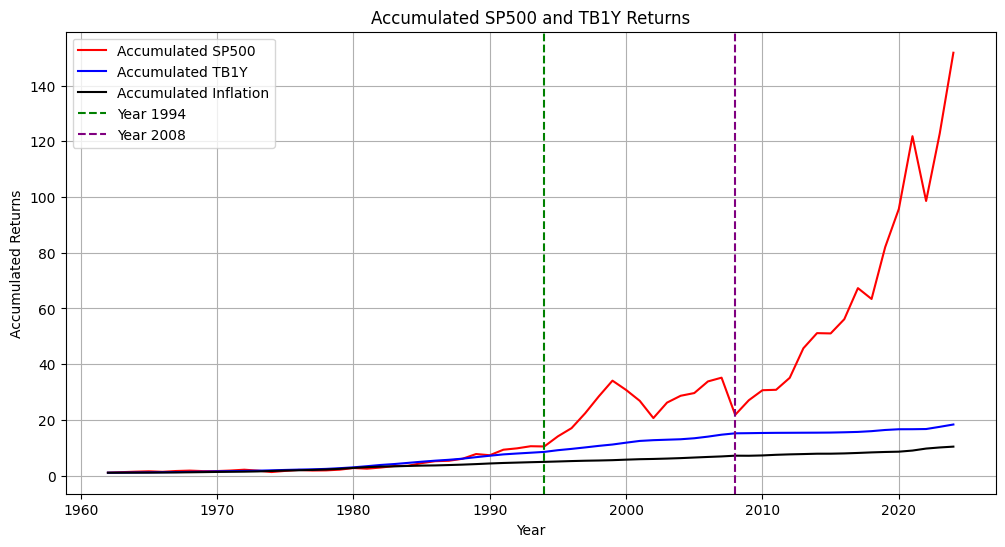

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(accum.index, accum['SP500'], label='Accumulated SP500', color='red')
plt.plot(accum.index, accum['TB1Y'], label='Accumulated TB1Y', color='blue')
plt.plot(accum.index, accum['Inflation'], label='Accumulated Inflation', color='black')

# Add vertical lines for the years 1994 and 2008
plt.axvline(x=1994, color='green', linestyle='--', label='Year 1994')
plt.axvline(x=2008, color='purple', linestyle='--', label='Year 2008')

plt.title('Accumulated SP500 and TB1Y Returns')
plt.xlabel('Year')
plt.ylabel('Accumulated Returns')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
df_before_1995 = df[df.index < 1995]
df_1995_to_2008 = df[(df.index >= 1995) & (df.index <= 2008)]
df_after_2008 = df[df.index > 2008]

print('df_before_1995')
display(df_before_1995)
print('\ndf_1995_to_2008')
display(df_1995_to_2008)
print('\ndf_after_2008')
display(df_after_2008)

df_before_1995


,SP500,TB1Y,Inflation
Year,,,
1963,20.2,3.05,1.24
1964,14.2,3.83,1.28
1965,10.2,3.99,1.59
1966,-12.0,4.96,3.02
1967,21.4,5.00,2.77
1968,8.8,5.76,4.27
1969,-10.4,6.46,5.46
1970,1.3,8.32,5.84
1971,11.9,4.94,4.29



df_1995_to_2008


,SP500,TB1Y,Inflation
Year,,,
1995,34.9,7.20,2.81
1996,20.9,5.18,2.93
1997,31.5,5.51,2.34
1998,27.1,5.51,1.55
1999,19.8,4.53,2.19
2000,-9.8,5.98,3.38
2001,-12.7,5.32,2.83
2002,-23.1,2.17,1.59
2003,26.9,1.32,2.27



df_after_2008


,SP500,TB1Y,Inflation
Year,,,
2009,24.1,0.37,-0.36
2010,13.3,0.47,1.64
2011,0.5,0.29,3.16
2012,14.0,0.12,2.07
2013,30.2,0.16,1.46
2014,11.9,0.13,1.62
2015,-0.2,0.25,0.12
2016,10.0,0.65,1.26
2017,19.9,0.85,2.13


In [14]:
new_row_1 = pd.DataFrame({'SP500': [1], 'TB1Y': [1], 'Inflation': [1]}, index=[1962])
accum_before_1995 = pd.concat([new_row_1, df_before_1995])

new_row_2 = pd.DataFrame({'SP500': [1], 'TB1Y': [1], 'Inflation': [1]}, index=[1994])
accum_1995_2008 = pd.concat([new_row_2, df_1995_to_2008])

new_row_3 = pd.DataFrame({'SP500': [1], 'TB1Y': [1], 'Inflation': [1]}, index=[2008])
accum_after_2008 = pd.concat([new_row_3, df_after_2008])

In [15]:
accum_before_1995 = accum_before_1995.reset_index()
accum_before_1995.rename(columns={'index': 'Year'}, inplace=True)
accum_1995_2008 = accum_1995_2008.reset_index()
accum_1995_2008.rename(columns={'index': 'Year'}, inplace=True)
accum_after_2008 = accum_after_2008.reset_index()
accum_after_2008.rename(columns={'index': 'Year'}, inplace=True)

for i in range(1, len(accum_before_1995)):
    accum_before_1995.loc[i, 'SP500'] = accum_before_1995.loc[i-1, 'SP500'] * (1 + accum_before_1995.loc[i, 'SP500'] / 100)
    accum_before_1995.loc[i, 'TB1Y'] = accum_before_1995.loc[i-1, 'TB1Y'] * (1 + accum_before_1995.loc[i, 'TB1Y'] / 100)
    accum_before_1995.loc[i, 'Inflation'] = accum_before_1995.loc[i-1, 'Inflation'] * (1 + accum_before_1995.loc[i, 'Inflation'] / 100)
for i in range(1, len(accum_1995_2008)):
    accum_1995_2008.loc[i, 'SP500'] = accum_1995_2008.loc[i-1, 'SP500'] * (1 + accum_1995_2008.loc[i, 'SP500'] / 100)
    accum_1995_2008.loc[i, 'TB1Y'] = accum_1995_2008.loc[i-1, 'TB1Y'] * (1 + accum_1995_2008.loc[i, 'TB1Y'] / 100)
    accum_1995_2008.loc[i, 'Inflation'] = accum_1995_2008.loc[i-1, 'Inflation'] * (1 + accum_1995_2008.loc[i, 'Inflation'] / 100)
for i in range(1, len(accum_after_2008)):
    accum_after_2008.loc[i, 'SP500'] = accum_after_2008.loc[i-1, 'SP500'] * (1 + accum_after_2008.loc[i, 'SP500'] / 100)
    accum_after_2008.loc[i, 'TB1Y'] = accum_after_2008.loc[i-1, 'TB1Y'] * (1 + accum_after_2008.loc[i, 'TB1Y'] / 100)
    accum_after_2008.loc[i, 'Inflation'] = accum_after_2008.loc[i-1, 'Inflation'] * (1 + accum_after_2008.loc[i, 'Inflation'] / 100)

accum_before_1995 = accum_before_1995.set_index('Year')
accum_1995_2008 = accum_1995_2008.set_index('Year')
accum_after_2008 = accum_after_2008.set_index('Year')

print('accum_before_1995')
display(accum_before_1995)
print('\naccum_1995_2008')
display(accum_1995_2008)
print('\naccum_after_2008')
display(accum_after_2008)

accum_before_1995


,SP500,TB1Y,Inflation
Year,,,
1962,1.000000,1.000000,1.000000
1963,1.202000,1.030500,1.012400
1964,1.372684,1.069968,1.025359
1965,1.512698,1.112660,1.041662
1966,1.331174,1.167848,1.073120
1967,1.616045,1.226240,1.102846
1968,1.758257,1.296872,1.149937
1969,1.575399,1.380650,1.212724
1970,1.595879,1.495520,1.283547



accum_1995_2008


,SP500,TB1Y,Inflation
Year,,,
1994,1.000000,1.000000,1.000000
1995,1.349000,1.072000,1.028100
1996,1.630941,1.127530,1.058223
1997,2.144687,1.189656,1.082986
1998,2.725898,1.255207,1.099772
1999,3.265625,1.312067,1.123857
2000,2.945594,1.390529,1.161843
2001,2.571504,1.464505,1.194724
2002,1.977486,1.496285,1.213720



accum_after_2008


,SP500,TB1Y,Inflation
Year,,,
2008,1.000000,1.000000,1.000000
2009,1.241000,1.003700,0.996400
2010,1.406053,1.008417,1.012741
2011,1.413083,1.011342,1.044744
2012,1.610915,1.012555,1.066370
2013,2.097411,1.014175,1.081939
2014,2.347003,1.015494,1.099466
2015,2.342309,1.018033,1.100786
2016,2.576540,1.024650,1.114655


In [16]:
index_1994 = accum_before_1995.index.get_loc(1994)
result_sp500_1994 = round((np.power(accum_before_1995.loc[1994, 'SP500'], 1/index_1994)-1)*100,2)
result_tb1y_1994 = round((np.power(accum_before_1995.loc[1994, 'TB1Y'], 1/index_1994)-1)*100,2)
result_infl_1994 = round((np.power(accum_before_1995.loc[1994, 'Inflation'], 1/index_1994)-1)*100,2)

index_2008 = accum_1995_2008.index.get_loc(2008)
result_sp500_2008 = round((np.power(accum_1995_2008.loc[2008, 'SP500'], 1/index_2008)-1)*100,2)
result_tb1y_2008 = round((np.power(accum_1995_2008.loc[2008, 'TB1Y'], 1/index_2008)-1)*100,2)
result_infl_2008 = round((np.power(accum_1995_2008.loc[2008, 'Inflation'], 1/index_2008)-1)*100,2)

index_2024 = accum_after_2008.index.get_loc(2024)
result_sp500_2024 = round((np.power(accum_after_2008.loc[2024, 'SP500'], 1/index_2024)-1)*100,2)
result_tb1y_2024 = round((np.power(accum_after_2008.loc[2024, 'TB1Y'], 1/index_2024)-1)*100,2)
result_infl_2024 = round((np.power(accum_after_2008.loc[2024, 'Inflation'], 1/index_2024)-1)*100,2)

annual_performance = pd.DataFrame({'SP500': [result_sp500_1994, result_sp500_2008, result_sp500_2024],
                                   'TB1Y': [result_tb1y_1994, result_tb1y_2008, result_tb1y_2024],
                                   'Inflation': [result_infl_1994, result_infl_2008, result_infl_2024]
                                   },
                                    index=['1962-1994', '1995-2008', '2009-2024']
                                  )
print('Annual performance')
annual_performance

Annual performance


,SP500,TB1Y,Inflation
1962-1994,7.6,6.91,5.09
1995-2008,5.4,4.23,2.70
2009-2024,12.9,1.19,2.38


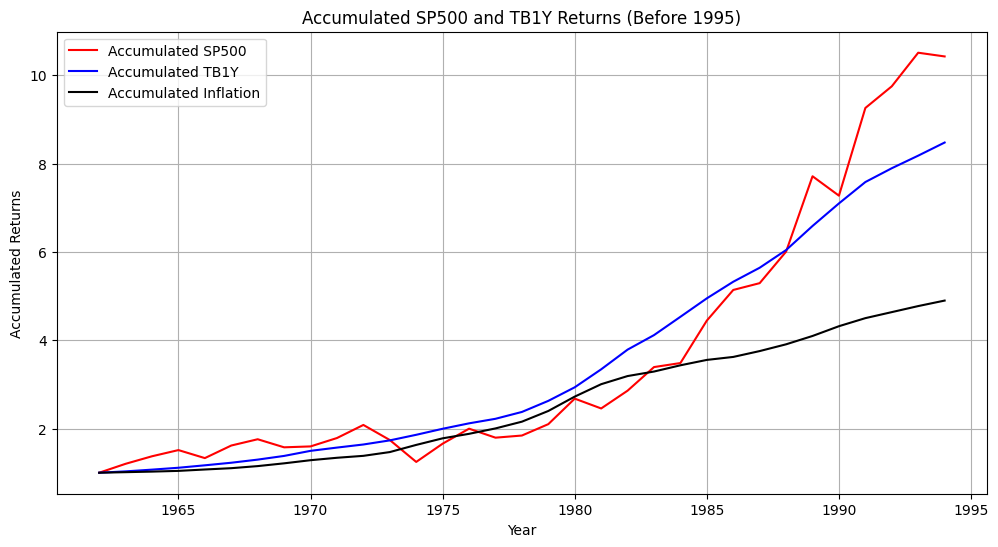

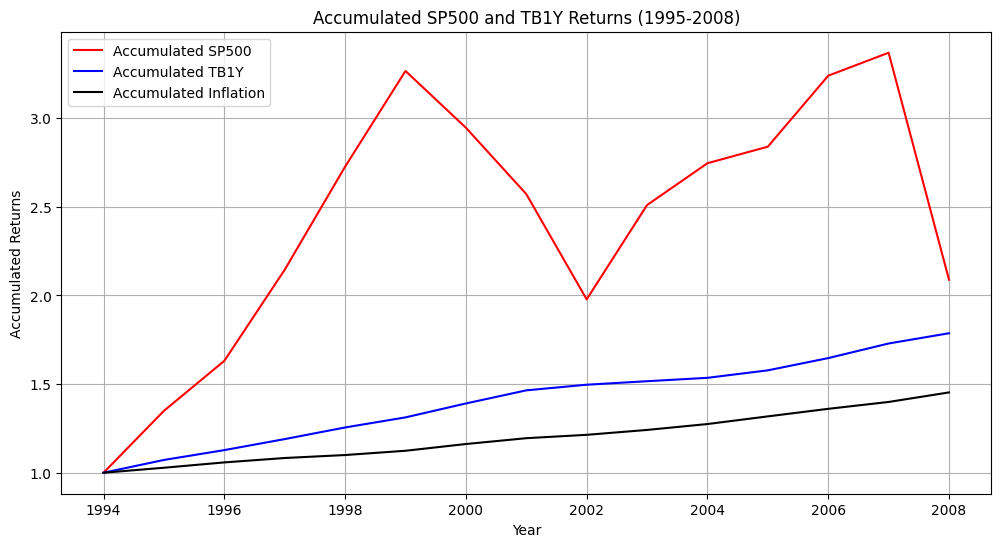

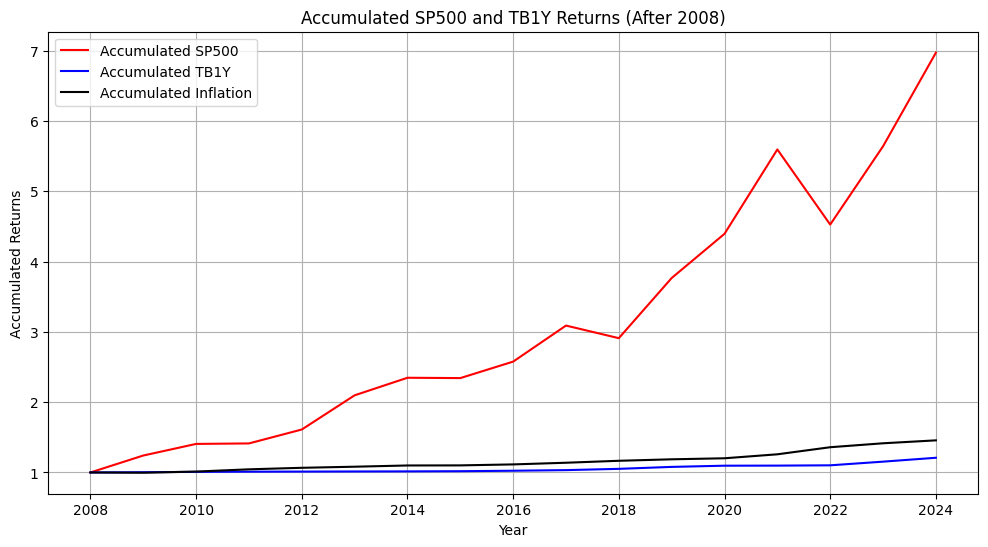

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(accum_before_1995.index, accum_before_1995['SP500'], label='Accumulated SP500', color='red')
plt.plot(accum_before_1995.index, accum_before_1995['TB1Y'], label='Accumulated TB1Y', color='blue')
plt.plot(accum_before_1995.index, accum_before_1995['Inflation'], label='Accumulated Inflation', color='black')
plt.title('Accumulated SP500 and TB1Y Returns (Before 1995)')
plt.xlabel('Year')
plt.ylabel('Accumulated Returns')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(accum_1995_2008.index, accum_1995_2008['SP500'], label='Accumulated SP500', color='red')
plt.plot(accum_1995_2008.index, accum_1995_2008['TB1Y'], label='Accumulated TB1Y', color='blue')
plt.plot(accum_1995_2008.index, accum_1995_2008['Inflation'], label='Accumulated Inflation', color='black')
plt.title('Accumulated SP500 and TB1Y Returns (1995-2008)')
plt.xlabel('Year')
plt.ylabel('Accumulated Returns')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(accum_after_2008.index, accum_after_2008['SP500'], label='Accumulated SP500', color='red')
plt.plot(accum_after_2008.index, accum_after_2008['TB1Y'], label='Accumulated TB1Y', color='blue')
plt.plot(accum_after_2008.index, accum_after_2008['Inflation'], label='Accumulated Inflation', color='black')
plt.title('Accumulated SP500 and TB1Y Returns (After 2008)')
plt.xlabel('Year')
plt.ylabel('Accumulated Returns')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
print('df_before_1995')
display(df_before_1995.describe())
print('\ndf_1995_to_2008')
display(df_1995_to_2008.describe())
print('\ndf_after_2008')
display(df_after_2008.describe())

df_before_1995


,SP500,TB1Y,Inflation
count,32.000000,32.000000,32.000000
mean,8.640625,6.942812,5.133750
std,14.770718,2.788434,3.070136
min,-28.500000,3.050000,1.240000
25%,0.775000,4.920000,3.027500
50%,11.050000,6.640000,4.280000
75%,19.075000,8.410000,6.142500
max,33.200000,13.860000,13.550000



df_1995_to_2008


,SP500,TB1Y,Inflation
count,14.000000,14.000000,14.000000
mean,7.742857,4.246429,2.705714
std,21.851728,1.807410,0.665209
min,-38.000000,1.260000,1.550000
25%,-6.500000,2.897500,2.287500
50%,11.750000,4.765000,2.820000
75%,25.400000,5.462500,3.155000
max,34.900000,7.200000,3.840000



df_after_2008


,SP500,TB1Y,Inflation
count,16.000000,16.000000,16.000000
mean,13.775000,1.205000,2.396875
std,13.944533,1.559821,1.976089
min,-19.100000,0.100000,-0.360000
25%,7.625000,0.227500,1.410000
50%,15.350000,0.430000,1.940000
75%,24.225000,1.632500,3.002500
max,30.200000,4.790000,8.000000


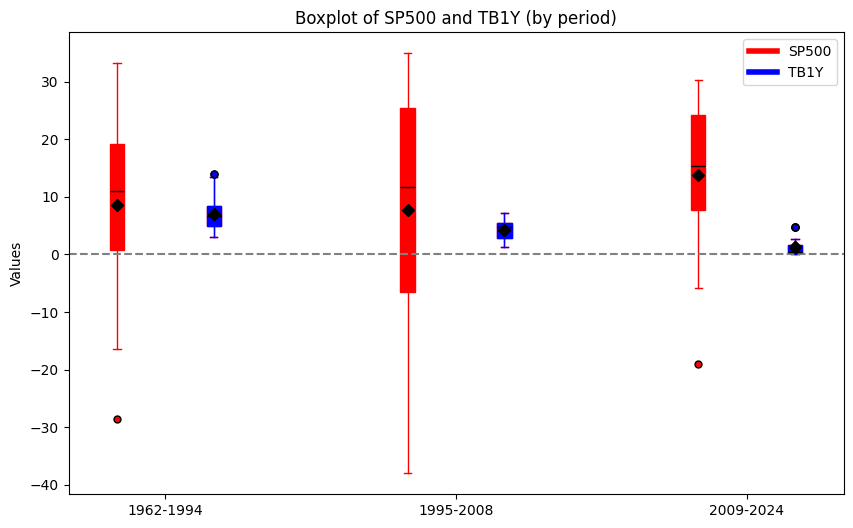

In [19]:
# Create the boxplot
plt.figure(figsize=(10, 6))

data = [df_before_1995['SP500'], df_before_1995['TB1Y'],
        df_1995_to_2008['SP500'], df_1995_to_2008['TB1Y'],
        df_after_2008['SP500'], df_after_2008['TB1Y']]

# Labels for the original boxes
labels = ['SP500 (1962-1994)', 'TB1Y (1962-1994)',
          'SP500 (1995-2008)', 'TB1Y (1995-2008)',
          'SP500 (2009-2024)', 'TB1Y (2009-2024)']

# Positions for the original boxes
positions = [1, 2, 4, 5, 7, 8]

# Labels for the periods (to be placed in the center)
period_labels = ['1962-1994', '1995-2008', '2009-2024']

# Positions for the period labels (center of each pair)
period_positions = [1.5, 4.5, 7.5]

boxprops_sp500 = dict(facecolor='red', color='red')
boxprops_tb1y = dict(facecolor='blue', color='blue')

for i in range(0, len(data), 2):
    plt.boxplot(data[i:i+2], positions=positions[i:i+2], patch_artist=True,
                boxprops=boxprops_sp500 if i % 2 == 0 else boxprops_sp500,
                whiskerprops=dict(color='red'),
                capprops=dict(color='red'),
                medianprops=dict(color='black'),
                flierprops=dict(markerfacecolor='red', marker='o', markersize=5),
                showmeans=True, meanprops=dict(markerfacecolor="black", markeredgecolor='black', marker='D'))
    plt.boxplot(data[i+1:i+2], positions=positions[i+1:i+2], patch_artist=True,
                boxprops=boxprops_tb1y,
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                medianprops=dict(color='black'),
                flierprops=dict(markerfacecolor='blue', marker='o', markersize=5),
                showmeans=True, meanprops=dict(markerfacecolor="black", markeredgecolor='black', marker='D'))

# Customize the plot
plt.xticks(period_positions, period_labels)  # Set x-ticks to period positions
plt.title('Boxplot of SP500 and TB1Y (by period)')
plt.ylabel('Values')
plt.axhline(y=0, color='gray', linestyle='--')  # Horizontal line at 0

# Create custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4)]
plt.legend(custom_lines, ['SP500', 'TB1Y'])

plt.show()

Histogramas

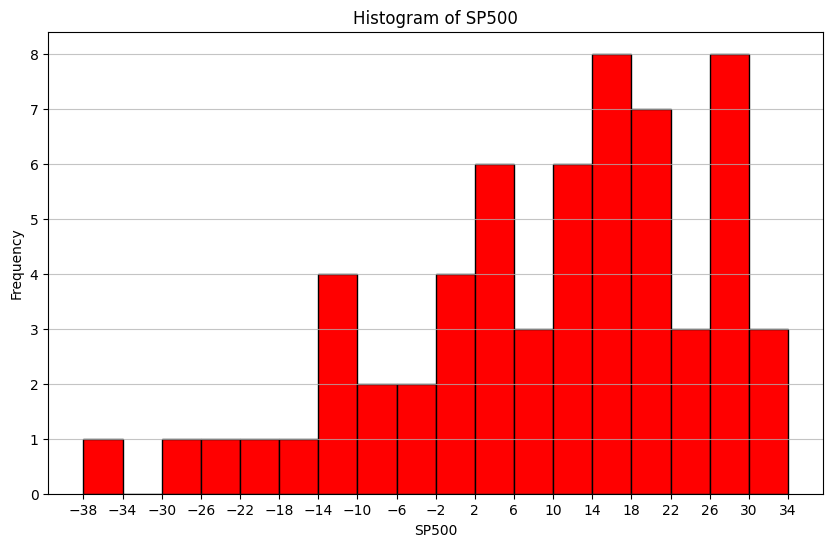

In [20]:
# prompt: hace un histograma con los datos de df. Mostrá los limites entre las barras. los valores limites del histograma que sean rangos de numeros enteros. Para SP500, que los rangos vayan de a 4 unidades.

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains the 'SP500' column
plt.figure(figsize=(10, 6))
plt.hist(df['SP500'], bins=range(int(min(df['SP500'])), int(max(df['SP500'])) + 4, 4), color='red', edgecolor='black')
plt.title('Histogram of SP500')
plt.xlabel('SP500')
plt.ylabel('Frequency')
plt.xticks(range(int(min(df['SP500'])), int(max(df['SP500'])) + 4, 4)) # set x ticks to be at the bin edges
plt.grid(axis='y', alpha=0.75)
plt.show()


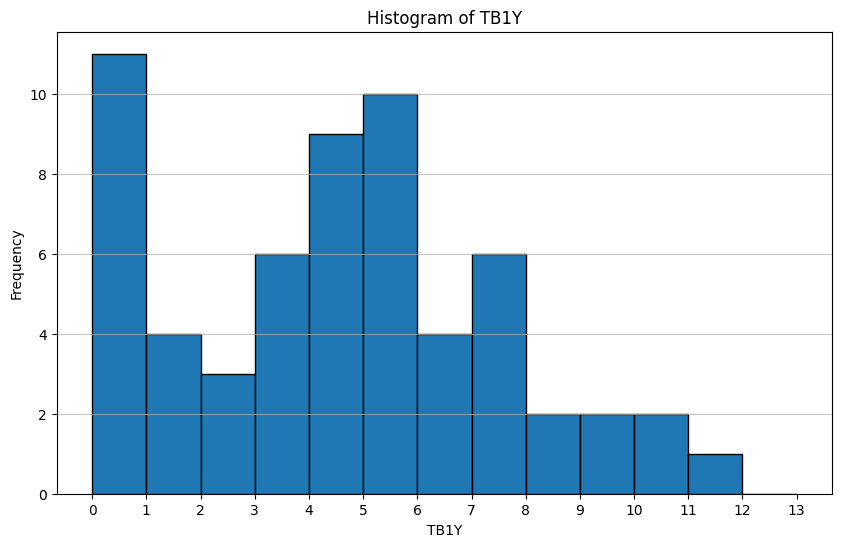

In [21]:
# prompt: hacé un histograma de tb1y de color rojo

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and it contains the 'TB1Y' column
plt.figure(figsize=(10, 6))
plt.hist(df['TB1Y'], bins=range(int(min(df['TB1Y'])), int(max(df['TB1Y'])) + 1, 1), edgecolor='black')
plt.title('Histogram of TB1Y')
plt.xlabel('TB1Y')
plt.ylabel('Frequency')
plt.xticks(range(int(min(df['TB1Y'])), int(max(df['TB1Y'])) + 1, 1)) # set x ticks to be at the bin edges
plt.grid(axis='y', alpha=0.75)
plt.show()


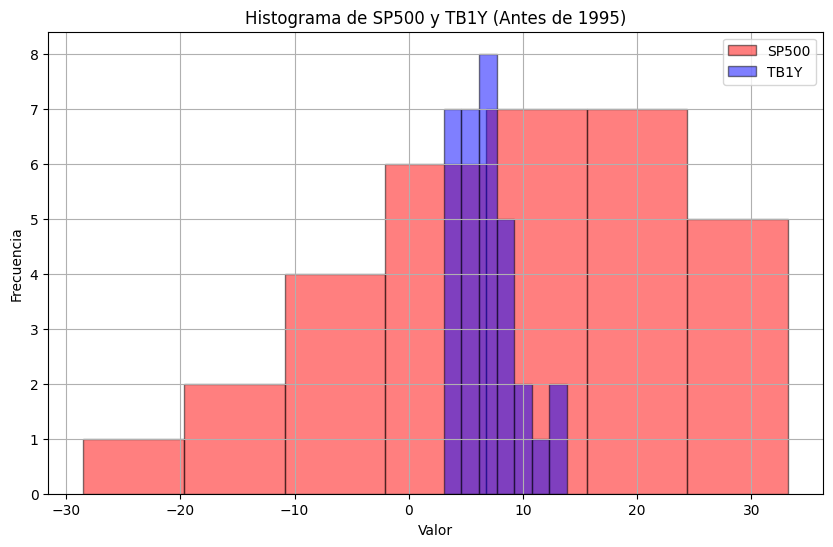

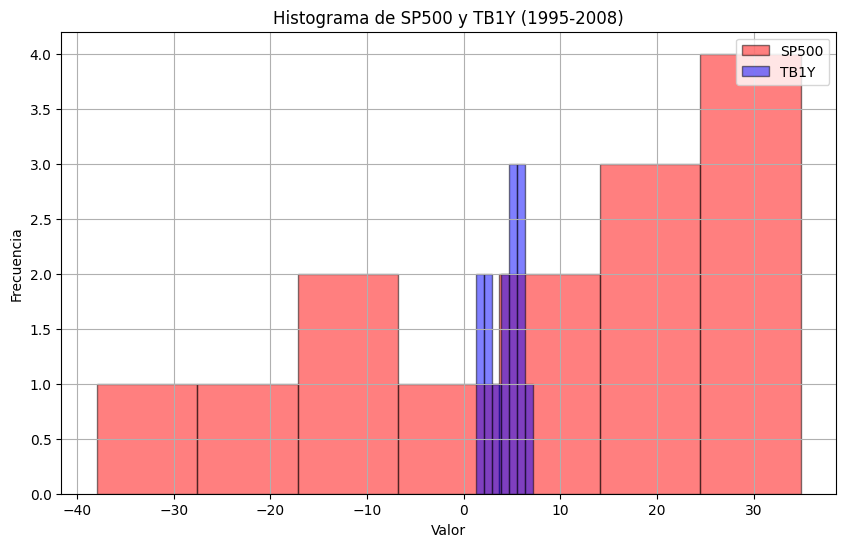

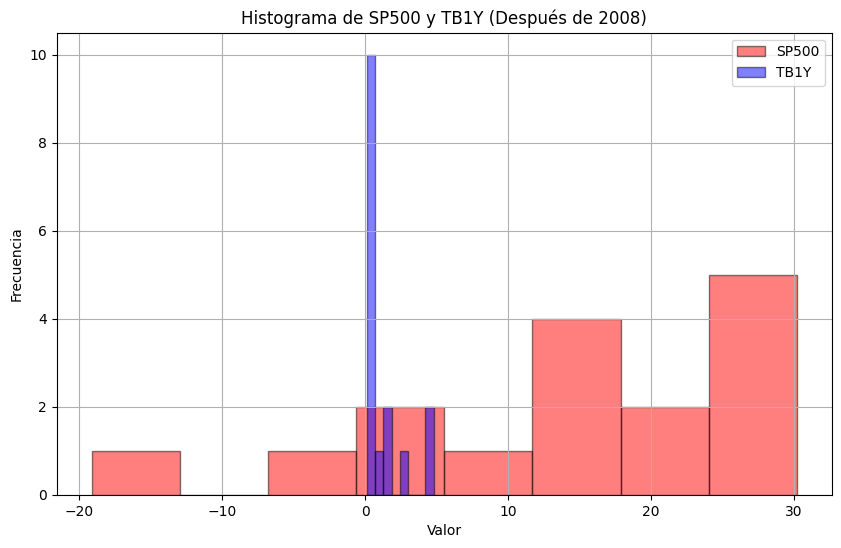

In [22]:
# prompt: hacé los histogramas de df_before_1995, df_1995_to_2008 y df_after_2008

import matplotlib.pyplot as plt
# Histograma para df_before_1995
plt.figure(figsize=(10, 6))
plt.hist(df_before_1995['SP500'], bins=7, alpha=0.5, label='SP500', color='red', edgecolor='black')
plt.hist(df_before_1995['TB1Y'], bins=7, alpha=0.5, label='TB1Y', color='blue', edgecolor='black')
plt.title('Histograma de SP500 y TB1Y (Antes de 1995)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Histograma para df_1995_to_2008
plt.figure(figsize=(10, 6))
plt.hist(df_1995_to_2008['SP500'], bins=7, alpha=0.5, label='SP500', color='red', edgecolor='black')
plt.hist(df_1995_to_2008['TB1Y'], bins=7, alpha=0.5, label='TB1Y', color='blue', edgecolor='black')
plt.title('Histograma de SP500 y TB1Y (1995-2008)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Histograma para df_after_2008
plt.figure(figsize=(10, 6))
plt.hist(df_after_2008['SP500'], bins=8, alpha=0.5, label='SP500', color='red', edgecolor='black')
plt.hist(df_after_2008['TB1Y'], bins=8, alpha=0.5, label='TB1Y', color='blue', edgecolor='black')
plt.title('Histograma de SP500 y TB1Y (Después de 2008)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Gráfica de Dispersión - Scatter Plot

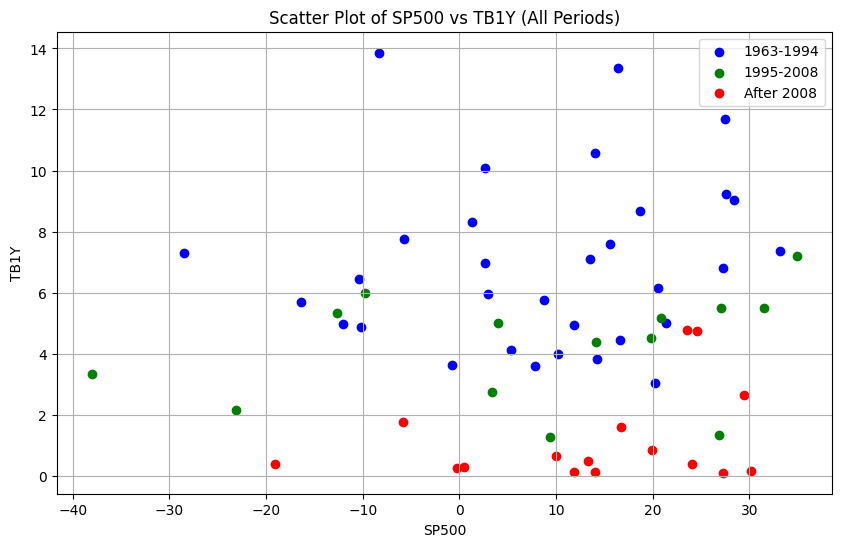

In [23]:
# prompt: hacé un único scatter plot de df_before_1995, df_1995_to_2008 y df_after_2008 diferenciando los puntos por colores

import matplotlib.pyplot as plt
# Assuming df_before_1995, df_1995_to_2008, and df_after_2008 are already defined

plt.figure(figsize=(10, 6))

plt.scatter(df_before_1995['SP500'], df_before_1995['TB1Y'], label='1963-1994', color='blue')
plt.scatter(df_1995_to_2008['SP500'], df_1995_to_2008['TB1Y'], label='1995-2008', color='green')
plt.scatter(df_after_2008['SP500'], df_after_2008['TB1Y'], label='After 2008', color='red')

plt.xlabel('SP500')
plt.ylabel('TB1Y')
plt.title('Scatter Plot of SP500 vs TB1Y (All Periods)')
plt.grid(True)
plt.legend()
plt.show()
